In [1]:
import gc

gc.collect()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import plotly.express as px
import holoviews as hv

from sklearn.ensemble import RandomForestClassifier

import shap 


import warnings
warnings.filterwarnings('ignore')

shap.initjs()

# Get the current working directory
current_dir = os.getcwd()


# Navigate two directories back
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)


# define the data directory
data_dir = parent_dir + "/data/"

# This creates the full path to the output directory
Output = "results/"
output_dir = os.path.join(parent_dir, Output)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Path to the 'src' directory
src_path = os.path.join(parent_dir, 'src')



In [2]:
# Loop through each entry in the 'src' directory
for item in os.listdir(src_path):
    full_path = os.path.join(src_path, item)
    # Check if the entry is a directory
    if os.path.isdir(full_path):
        # Add the directory to sys.path
        sys.path.append(full_path)

In [3]:
from random_forest import train_RandomForest

# Load the data
data = pd.read_csv(data_dir + "cleaned/no_nan_ordinal_encoded.csv")
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,STATUS
0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
int_cols = np.setxor1d(np.array(data.columns), np.array(['AMT_CREDIT', 'AMT_INCOME_TOTAL']))
data[int_cols] = data[int_cols].astype(int)
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,STATUS
0,1,0,1,0,1,0,202500.0,406597.5,7,4,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,270000.0,1293502.5,4,1,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,1,0,67500.0,135000.0,7,4,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,135000.0,312682.5,7,4,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,0,121500.0,513000.0,7,4,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Assuming your data is stored in a DataFrame called 'df'
selected_columns = []
for column in data.columns:
    unique_values = data[column].nunique()
    if unique_values <= 10 and unique_values > 2:
        selected_columns.append(column)

# Print the selected columns
print(selected_columns)

['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START']


In [6]:
data[selected_columns] = data[selected_columns].astype('category')

In [7]:
from fn_encoding import one_hot_encode

data = one_hot_encode(data, selected_columns)
data.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_nan,WEEKDAY_APPR_PROCESS_START_1,WEEKDAY_APPR_PROCESS_START_2,WEEKDAY_APPR_PROCESS_START_3,WEEKDAY_APPR_PROCESS_START_4,WEEKDAY_APPR_PROCESS_START_5,WEEKDAY_APPR_PROCESS_START_6,WEEKDAY_APPR_PROCESS_START_nan
0,1,0,0,1,0,202500.0,406597.5,63,-9461,-637,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,270000.0,1293502.5,11,-16765,-1188,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,1,0,67500.0,135000.0,47,-19046,-225,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,135000.0,312682.5,34,-19005,-3039,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,121500.0,513000.0,74,-19932,-3038,...,1,0,0,0,0,0,1,0,0,0


In [8]:
# Assuming your data is stored in a pandas DataFrame called 'data'
data.replace({True: 1, False: 0}, inplace=True)
data.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_nan,WEEKDAY_APPR_PROCESS_START_1,WEEKDAY_APPR_PROCESS_START_2,WEEKDAY_APPR_PROCESS_START_3,WEEKDAY_APPR_PROCESS_START_4,WEEKDAY_APPR_PROCESS_START_5,WEEKDAY_APPR_PROCESS_START_6,WEEKDAY_APPR_PROCESS_START_nan
0,1,0,0,1,0,202500.0,406597.5,63,-9461,-637,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,270000.0,1293502.5,11,-16765,-1188,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,1,0,67500.0,135000.0,47,-19046,-225,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,135000.0,312682.5,34,-19005,-3039,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,121500.0,513000.0,74,-19932,-3038,...,1,0,0,0,0,0,1,0,0,0


In [88]:
# Assuming your data is stored in a DataFrame called 'data'
column_types = data.dtypes

print(column_types)

TARGET                          int64
NAME_CONTRACT_TYPE              int64
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
CNT_CHILDREN                    int64
                                ...  
WEEKDAY_APPR_PROCESS_START_2    int64
WEEKDAY_APPR_PROCESS_START_3    int64
WEEKDAY_APPR_PROCESS_START_4    int64
WEEKDAY_APPR_PROCESS_START_5    int64
WEEKDAY_APPR_PROCESS_START_6    int64
Length: 80, dtype: object


In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["TARGET", "STATUS"])
y = data["TARGET"]


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
del data, X, y
X_train.shape, X_test.shape, y_train.head()


((246008, 86),
 (61503, 86),
 123473    0
 10118     0
 64716     1
 234940    0
 236051    0
 Name: TARGET, dtype: int64)

In [90]:
model = train_RandomForest(X_train, y_train, n_estimators=2500, min_samples_split=0.1)

In [23]:
run_dir = os.path.join(parent_dir, 'model_runs')
run_dir = os.path.join(run_dir, 'randomforest')

if not os.path.exists(run_dir):
    os.makedirs(run_dir)

In [22]:
run_dir

NameError: name 'run_dir' is not defined

<Figure size 1000x600 with 0 Axes>

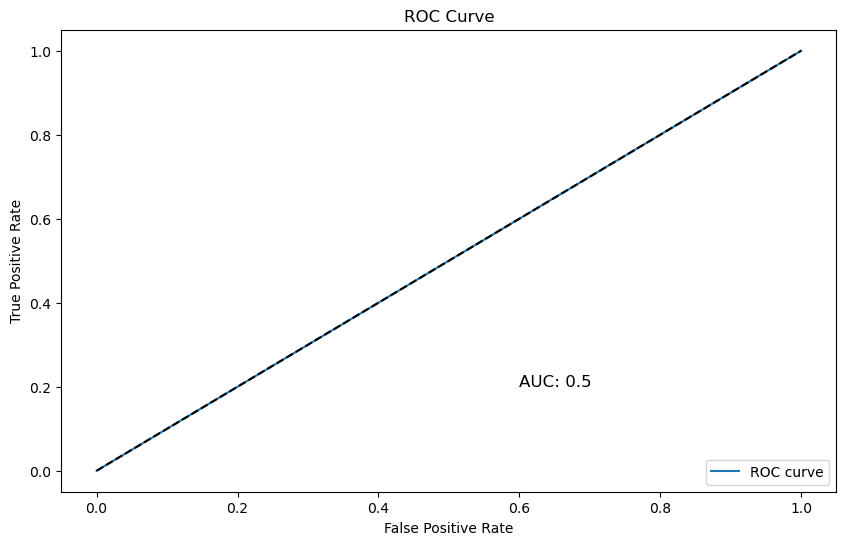

In [91]:
from PerformanceMetrics import plot_roc

fig = plt.figure(figsize=(10, 6))
f = plot_roc(model, X_test, y_test)
#f.savefig(results_dir + '/roc_curve.png', dpi=600, format='png',bbox_inches='tight')
plt.show()


In [99]:
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, recall_score, precision_score


predictions = model.predict(X_test)

new_threshold = 0.5

# Apply the new threshold to determine class labels
new_predictions = (predictions >= new_threshold).astype(int)

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, new_predictions)  # Note: use the probabilities, not the binary predictions
roc_auc = auc(fpr, tpr)

# F1 Score
f1 = f1_score(y_test, new_predictions)

# Recall
recall = recall_score(y_test, new_predictions)


# Confusion Matrix to derive False Positives
tn, fp, fn, tp = confusion_matrix(y_test, new_predictions).ravel()

# Output the calculated metrics
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")
print(f"F1 Score: {f1}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")


Recall: 0.02424732269145282
ROC AUC: 0.508268938426039
F1 Score: 0.043596730245231606
False Positives: 436
False Negatives: 4829


# Hyperparamter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(10, 200, 50),
    'min_samples_leaf': range(1, 10, 3),
    'min_samples_split': range(2, 10, 3),
    'n_estimators': range(1000,1600,250),
} # 'max_features': [2, 3],
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [32]:
np.where(predictions>0)[0].size 

0

In [60]:
y_train.value_counts()

TARGET
0.0    226132
1.0     19876
Name: count, dtype: int64

In [98]:
from matplotlib import pyplot
import xgboost as xgb

# XGB Classifier
xg_cl = xgb.XGBClassifier(learning_rate = 0.9, max_depth = 1000, n_estimators = 1000)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)


# Predict the labels of the test set: preds
predictions = xg_cl.predict(X_test)

# Assuming y_pred contains the predicted values and y_test contains the actual values
recall = recall_score(y_test, predictions)

print("Recall:", recall)

Recall: 0.02424732269145282


In [11]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter grid
param_grid = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
    }

# Define the hyperparameter distributions
param_dist = {
    #'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.9),
    #'subsample': stats.uniform(0.5, 0.5),
    #'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier(n_estimators=1000)

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='recall')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best set of hyperparameters:  {'learning_rate': 0.07958663202561847}
Best score:  0.9188806867493202


In [26]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    #'max_depth': range(3, 10, 1),
    'n_estimators': range(100, 10000, 500),
    'learning_rate': np.logspace(np.log10(0.01), np.log10(10), num=20),
    #'subsample': [0.5, 0.7, 1]
    }

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

KeyboardInterrupt: 

In [20]:
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, recall_score, precision_score

# Initialize the XGBClassifier with the best parameters
model = xgb.XGBClassifier(n_estimators=1000,**grid_search.best_params_)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Assuming y_pred contains the predicted values and y_test contains the actual values
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Recall: 0.05981006263891695


<Figure size 1000x600 with 0 Axes>

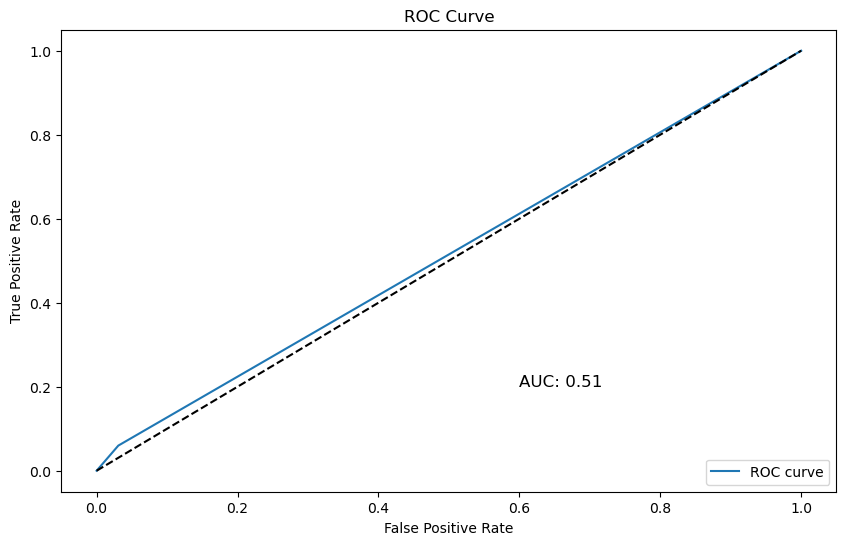

In [24]:
from PerformanceMetrics import plot_roc

experiment_path = os.path.join(parent_dir, 'model_runs/xgboost')

fig = plt.figure(figsize=(10, 6))
f = plot_roc(model, X_test, y_test)
f.savefig(experiment_path + '/roc_curve-gridsearch0.png', dpi=600, format='png',bbox_inches='tight')
plt.show()
